In [1]:
from utils.cmod5n import *
from utils.functions import *
from glob import glob
from pathlib import Path
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy import stats
from multiprocessing import Pool


In [2]:
processed_data_path = Path("processed_data")
SAR_data_path_2020 = Path('/projects/fluxsar/data/Sentinel1/WV/2020')
SAR_data_path_2021 = Path('/projects/fluxsar/data/Sentinel1/WV/2021')

In [3]:
df_wv1_unstable_gt15 = pd.read_parquet(processed_data_path / 'wv1_unstable_gt15.parquet')
df_wv2_unstable_gt15 = pd.read_parquet(processed_data_path / 'wv2_unstable_gt15.parquet')

In [4]:
df_wv1_unstable_gt15.columns

Index(['value', 'wm_type', 'lonlat_center', 'tif_path', 'process_status',
       'class_1', 'prob_1', 'class_2', 'prob_2', 'class_3', 'prob_3',
       'all_prob', 'processing_time', 'filename', 'date_time', 'latitude',
       'longitude', 'L', 'wspd', 'wdir', 'sst', 'airt', 'p', 'rh', 'blh',
       'msdwswrf', 'msdwlwrf', 'renamed_filename', 'exists_ok',
       'path_to_sar_file', 'spectral_stats', 'mean_sigma0', 'var_sigma0',
       'skewness_sigma0', 'kurtosis_sigma0', 'mean_psd2d', 'var_psd2d',
       'skewness_psd2d', 'kurtosis_psd2d', 'mean_psd_band0', 'var_psd_band0',
       'skewness_psd_band0', 'kurtosis_psd_band0', 'mean_psd_band1',
       'var_psd_band1', 'skewness_psd_band1', 'kurtosis_psd_band1',
       'mean_psd_band2', 'var_psd_band2', 'skewness_psd_band2',
       'kurtosis_psd_band2', 'wdir_deg_from_north', 'perturbed_wdir',
       'phi_nominal_median', 'phi_perturbed_median', 'ground_heading_median',
       'azimuth_look_median', '0', '1', '2', '3', '4', '5', '6', '7', 

In [5]:
df_wv1_unstable_gt15['wdir_deg_from_north'] = np.rad2deg(df_wv1_unstable_gt15.wdir) % 360
df_wv2_unstable_gt15['wdir_deg_from_north'] = np.rad2deg(df_wv2_unstable_gt15.wdir) % 360

df_wv1_unstable_gt15['perturbed_wdir'] = add_direction_uncertainty(df_wv1_unstable_gt15['wdir_deg_from_north'])
df_wv2_unstable_gt15['perturbed_wdir'] = add_direction_uncertainty(df_wv2_unstable_gt15['wdir_deg_from_north'])

In [6]:
%%time

def process_row(row_dict):
    return add_phi_nominal_to_dataset(
        row_dict['path_to_sar_file'],
        row_dict['wdir_deg_from_north'],
        row_dict['perturbed_wdir']
    )

# Convert DataFrame to dictionary records
records_wv1 = df_wv1_unstable_gt15.to_dict('records')

# Use multiple processes
with Pool(processes=48) as pool:  
    results = pool.map(process_row, records_wv1)

# Convert results back to DataFrame
result_df_wv1 = pd.DataFrame(results, index=df_wv1_unstable_gt15.index)

df_wv1_unstable_gt15 = pd.concat([df_wv1_unstable_gt15, result_df_wv1], axis=1)


Error processing /projects/fluxsar/data/Sentinel1/WV/2020/S1A_WV_SLC__1SSV_20200508T055149_20200508T060616_032469_03C29E_0173__WV_035.nc: Unable to synchronously open file (truncated file: eof = 2097152, sblock->base_addr = 0, stored_eof = 2213315)
Error processing /projects/fluxsar/data/Sentinel1/WV/2020/S1A_WV_SLC__1SSV_20200508T041601_20200508T043747_032468_03C294_9766__WV_015.nc: Unable to synchronously open file (truncated file: eof = 1835008, sblock->base_addr = 0, stored_eof = 2277917)
Error processing /projects/fluxsar/data/Sentinel1/WV/2020/S1A_WV_SLC__1SSV_20200508T041601_20200508T043747_032468_03C294_9766__WV_029.nc: Unable to synchronously open file (truncated file: eof = 2097152, sblock->base_addr = 0, stored_eof = 2245616)
Error processing /projects/fluxsar/data/Sentinel1/WV/2020/S1A_WV_SLC__1SSV_20200508T035531_20200508T040337_032468_03C292_D740__WV_025.nc: Unable to synchronously open file (truncated file: eof = 1048576, sblock->base_addr = 0, stored_eof = 2363258)
CPU 

In [7]:
%%time

# Convert DataFrame to dictionary records
records_wv2 = df_wv2_unstable_gt15.to_dict('records')

# Use multiple processes
with Pool(processes=48) as pool:  
    results = pool.map(process_row, records_wv2)

# Convert results back to DataFrame
result_df_wv2 = pd.DataFrame(results, index=df_wv2_unstable_gt15.index)

df_wv2_unstable_gt15 = pd.concat([df_wv2_unstable_gt15, result_df_wv2], axis=1)

Error processing /projects/fluxsar/data/Sentinel1/WV/2021/S1A_WV_SLC__1SSV_20210803T044628_20210803T052056_039060_049BDC_CB28__WV_010.nc: Unable to synchronously open file (truncated file: eof = 524288, sblock->base_addr = 0, stored_eof = 2159162)
Error processing /projects/fluxsar/data/Sentinel1/WV/2021/S1B_WV_SLC__1SSV_20211209T183227_20211209T190035_029952_039369_2E11__WV_006.nc: Unable to synchronously open file (file signature not found)
Error processing /projects/fluxsar/data/Sentinel1/WV/2020/S1A_WV_SLC__1SSV_20201203T044852_20201203T045629_035517_042707_46E8__WV_018.nc: Unable to synchronously open file (file signature not found)
Error processing /projects/fluxsar/data/Sentinel1/WV/2020/S1A_WV_SLC__1SSV_20200508T055149_20200508T060616_032469_03C29E_0173__WV_006.nc: Unable to synchronously open file (truncated file: eof = 1572864, sblock->base_addr = 0, stored_eof = 2138264)
Error processing /projects/fluxsar/data/Sentinel1/WV/2020/S1A_WV_SLC__1SSV_20200508T035531_20200508T04033

In [ ]:
%%time

def process_row(row_dict):
    return perform_cmod_in_dataset(
        row_dict['path_to_sar_file'],
        row_dict['wdir_deg_from_north'],
        row_dict['perturbed_wdir'],
        row_dict['wspd']
    )

# Convert DataFrame to dictionary records
records_wv1 = df_wv1_unstable_gt15.to_dict('records')

# Use multiple processes
with Pool(processes=48) as pool:  
    results = pool.map(process_row, records_wv1)

# Convert results back to DataFrame
result_df_wv1 = pd.DataFrame(results, index=df_wv1_unstable_gt15.index)

df_wv1_unstable_gt15 = pd.concat([df_wv1_unstable_gt15, result_df_wv1], axis=1)

In [ ]:
%%time

# Convert DataFrame to dictionary records
records_wv2 = df_wv2_unstable_gt15.to_dict('records')

# Use multiple processes
with Pool(processes=48) as pool:  
    results = pool.map(process_row, records_wv2)

# Convert results back to DataFrame
result_df_wv2 = pd.DataFrame(results, index=df_wv2_unstable_gt15.index)

df_wv2_unstable_gt15 = pd.concat([df_wv2_unstable_gt15, result_df_wv2], axis=1)

In [5]:
new_cols = ['true_sigma0_median', 'true_sigma0_row_var', 
            'true_sigma0_column_var', 'true_sigma0_skew', 
            'true_sigma0_kurtosis', 'sigma0_cmod_median',
            'sigma0_cmod_row_var', 'sigma0_cmod_column_var',
            'sigma0_cmod_skew', 'sigma0_cmod_kurtosis',
            'wspd_median', 'wspd_var', 'wspd_skewness', 'wspd_kurtosis']

# Create a dictionary mapping the old column names to the new ones
old_cols = df_wv1_unstable_gt15.columns[-14:]
rename_dict = dict(zip(old_cols, new_cols))

# Rename columns using rename method
df_wv1_unstable_gt15 = df_wv1_unstable_gt15.rename(columns=rename_dict)
df_wv2_unstable_gt15 = df_wv2_unstable_gt15.rename(columns=rename_dict)

# Verify the columns were renamed
print(df_wv1_unstable_gt15.columns[-14:])

# Then try to save
df_wv1_unstable_gt15.to_parquet("processed_data/wv1_complete.parquet")
df_wv2_unstable_gt15.to_parquet("processed_data/wv2_complete.parquet")

Index(['value', 'wm_type', 'lonlat_center', 'tif_path', 'process_status',
       'class_1', 'prob_1', 'class_2', 'prob_2', 'class_3', 'prob_3',
       'all_prob', 'processing_time', 'filename', 'date_time', 'latitude',
       'longitude', 'L', 'wspd', 'wdir', 'sst', 'airt', 'p', 'rh', 'blh',
       'msdwswrf', 'msdwlwrf', 'renamed_filename', 'exists_ok',
       'path_to_sar_file', 'spectral_stats', 'mean_sigma0', 'var_sigma0',
       'skewness_sigma0', 'kurtosis_sigma0', 'mean_psd2d', 'var_psd2d',
       'skewness_psd2d', 'kurtosis_psd2d', 'mean_psd_band0', 'var_psd_band0',
       'skewness_psd_band0', 'kurtosis_psd_band0', 'mean_psd_band1',
       'var_psd_band1', 'skewness_psd_band1', 'kurtosis_psd_band1',
       'mean_psd_band2', 'var_psd_band2', 'skewness_psd_band2',
       'kurtosis_psd_band2', 'wdir_deg_from_north', 'perturbed_wdir',
       'phi_nominal_median', 'phi_perturbed_median', 'ground_heading_median',
       'azimuth_look_median', '0', '1', '2', '3', '4', '5', '6', '7', 

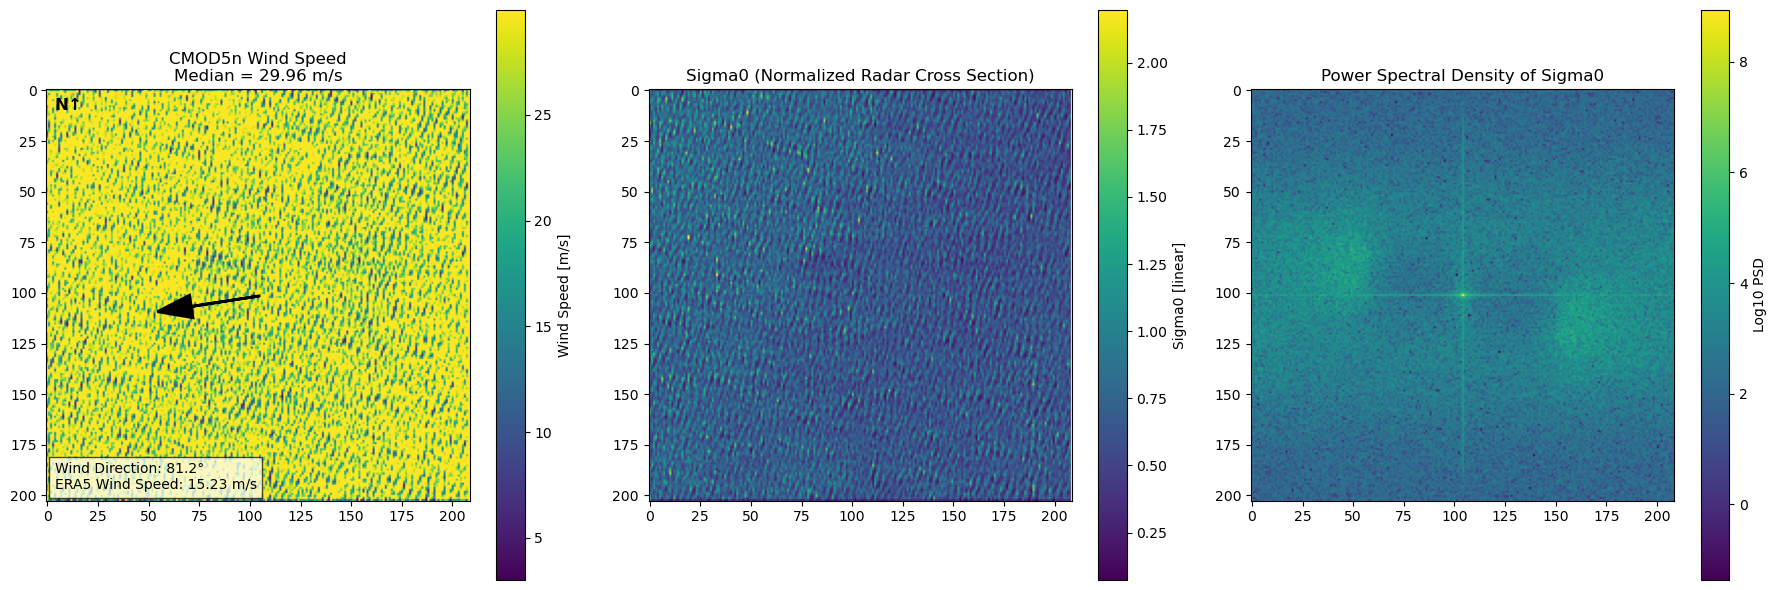

In [6]:
fig = plot_sar_wind(df_wv1_unstable_gt15, 50, cmod5n_inverse)
plt.show()

In [10]:
df_wv1_unstable_gt15["residual"] = df_wv1_unstable_gt15["wspd_median"] - df_wv1_unstable_gt15["wspd"]
df_wv2_unstable_gt15["residual"] = df_wv2_unstable_gt15["wspd_median"] - df_wv2_unstable_gt15["wspd"]

df_wv1_unstable_gt15["residual_normalized"]  = (df_wv1_unstable_gt15["wspd_median"] - df_wv1_unstable_gt15["wspd"]) / df_wv1_unstable_gt15["wspd"]
df_wv2_unstable_gt15["residual_normalized"] = (df_wv2_unstable_gt15["wspd_median"] - df_wv2_unstable_gt15["wspd"]) / df_wv2_unstable_gt15["wspd"]

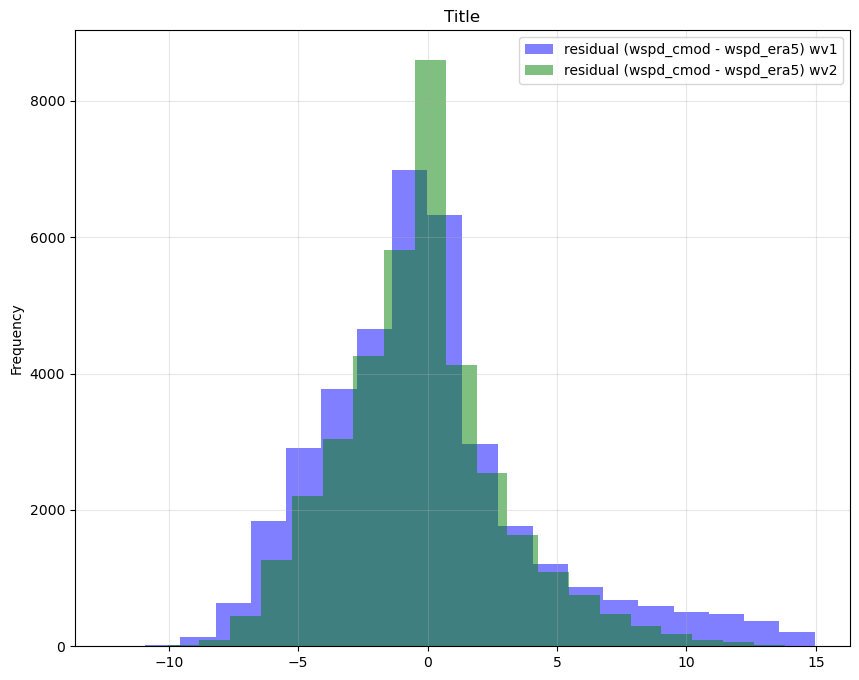

In [11]:
# Create a figure with two subplots stacked vertically
fig, ax1  = plt.subplots(1, 1, figsize=(10, 8), sharex=True)

# Plot first dataset (df_wv1_unstable_gt15) on top subplot
ax1.hist(df_wv1_unstable_gt15["residual"], bins=20, alpha=0.5, label="residual (wspd_cmod - wspd_era5) wv1", color="blue")
ax1.hist(df_wv2_unstable_gt15["residual"], bins=20, alpha=0.5, label="residual (wspd_cmod - wspd_era5) wv2",
          color="green")
ax1.set_title(f"Title")
ax1.set_ylabel("Frequency")
ax1.legend()
ax1.grid(alpha=0.3)

In [12]:
bias_wv1 = np.mean(df_wv1_unstable_gt15["residual"])
bias_wv2 = np.mean(df_wv2_unstable_gt15["residual"])

rmse_wv1 = np.sqrt(np.mean(df_wv1_unstable_gt15["residual"]**2))
rmse_wv2 = np.sqrt(np.mean(df_wv2_unstable_gt15["residual"]**2))

print(f"Bias WV1: {bias_wv1:.3f}, Bias WV2: {bias_wv2:.3f}")
print(f"RMSE WV1: {rmse_wv1:.3f}, RMSE WV2: {rmse_wv2:.3f}")


Bias WV1: -0.087, Bias WV2: -0.273
RMSE WV1: 4.182, RMSE WV2: 3.146


In [13]:
df_wv1_unstable_gt15["residual"].isna().sum(), df_wv2_unstable_gt15["residual"].isna().sum()

(np.int64(4), np.int64(4))

In [14]:
# filter df_wv1_unstable_gt15 and df_wv2_unstable_gt15 to remove NaN values in residual
df_wv1_unstable_gt15 = df_wv1_unstable_gt15[~df_wv1_unstable_gt15["residual"].isna()]
df_wv2_unstable_gt15 = df_wv2_unstable_gt15[~df_wv2_unstable_gt15["residual"].isna()]

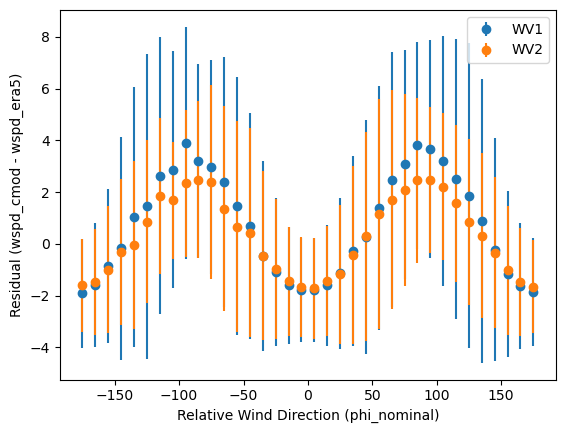

In [15]:
bin_edges = np.linspace(-180, 180, 37)  # Bin into 10° intervals
df_wv1_unstable_gt15['phi_bin'] = pd.cut(df_wv1_unstable_gt15['phi_nominal_median'], bins=bin_edges)
df_wv2_unstable_gt15['phi_bin'] = pd.cut(df_wv2_unstable_gt15['phi_nominal_median'], bins=bin_edges)

wv1_stats = df_wv1_unstable_gt15.groupby('phi_bin', observed=True)['residual'].agg(['mean', 'std'])
wv2_stats = df_wv2_unstable_gt15.groupby('phi_bin', observed=True)['residual'].agg(['mean', 'std'])

plt.errorbar(bin_edges[:-1] + 5, wv1_stats['mean'], yerr=wv1_stats['std'], label='WV1', fmt='o')
plt.errorbar(bin_edges[:-1] + 5, wv2_stats['mean'], yerr=wv2_stats['std'], label='WV2', fmt='o')
plt.xlabel("Relative Wind Direction (phi_nominal)")
plt.ylabel("Residual (wspd_cmod - wspd_era5)")
plt.legend()


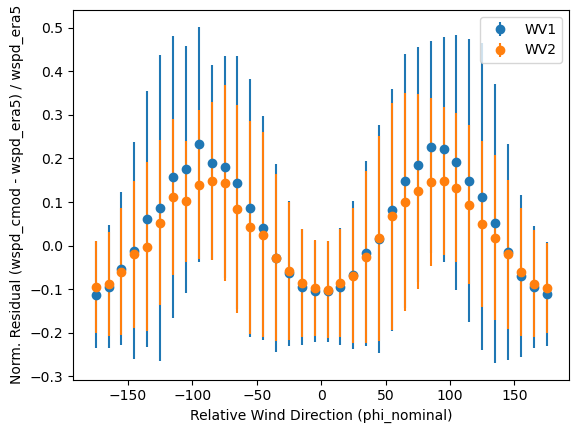

In [18]:
bin_edges = np.linspace(-180, 180, 37)  # Bin into 10° intervals
df_wv1_unstable_gt15['phi_bin'] = pd.cut(df_wv1_unstable_gt15['phi_nominal_median'], bins=bin_edges)
df_wv2_unstable_gt15['phi_bin'] = pd.cut(df_wv2_unstable_gt15['phi_nominal_median'], bins=bin_edges)

wv1_stats = df_wv1_unstable_gt15.groupby('phi_bin', observed=True)['residual_normalized'].agg(['mean', 'std'])
wv2_stats = df_wv2_unstable_gt15.groupby('phi_bin', observed=True)['residual_normalized'].agg(['mean', 'std'])

plt.errorbar(bin_edges[:-1] + 5, wv1_stats['mean'], yerr=wv1_stats['std'], label='WV1', fmt='o')
plt.errorbar(bin_edges[:-1] + 5, wv2_stats['mean'], yerr=wv2_stats['std'], label='WV2', fmt='o')
plt.xlabel("Relative Wind Direction (phi_nominal)")
plt.ylabel("Norm. Residual (wspd_cmod - wspd_era5) / wspd_era5")
plt.legend()


In [42]:
# df_wv1_unstable_gt15 = df_wv1_unstable_gt15.drop(columns=['phi_bin'])
# df_wv2_unstable_gt15 = df_wv2_unstable_gt15.drop(columns=['phi_bin'])

df_wv1_unstable_gt15.to_parquet("processed_data/wv1_complete.parquet")
df_wv2_unstable_gt15.to_parquet("processed_data/wv2_complete.parquet")